In [1]:
import sys
sys.path.append("../")


import pickle
import torch
import math

from models.GLASE_unshared_normalized import gLASE
from training.get_init import get_x_init

# CORA

In [2]:
## GENERATE EMBEDDINGS

dataset = 'cora'
mask = 'FULL'
device = 'cuda'
d = 6
gd_steps = 5


DATASET_FILE = f'../data/{dataset}_dataset.pkl'
Q_FILE = f'../data/{dataset}_q.pkl'
MASK_FILE = f'../data/{dataset}_mask_{mask}.pkl'
EMBEDDING_FILE = f'../data/{dataset}_glase_embeddings_d{d}_{gd_steps}steps_{mask}.pkl'
MODEL_FILE=f'../saved_models/test/{dataset}_glase_unshared_{gd_steps}steps_d{d}_{mask}.pt'


with open(DATASET_FILE, 'rb') as f:
    data = pickle.load(f)
data.to(device)

num_nodes = data.num_nodes
edge_index_2 = torch.ones([num_nodes,num_nodes],).nonzero().t().contiguous().to(device)

with open(MASK_FILE, 'rb') as f:
    mask = pickle.load(f)
mask = mask.to(device)

with open(Q_FILE, 'rb') as f:
    q = pickle.load(f)
Q = torch.diag(q[:d]).to(device)

model = gLASE(d,d, gd_steps)
model.load_state_dict(torch.load(MODEL_FILE))
model.to('cuda')


gLASE(
  (activation): Tanh()
  (gd): Sequential(
    (0) - GD_Block(): x, edge_index, edge_index_2, Q, mask -> x
    (1) - GD_Block(): x, edge_index, edge_index_2, Q, mask -> x
    (2) - GD_Block(): x, edge_index, edge_index_2, Q, mask -> x
    (3) - GD_Block(): x, edge_index, edge_index_2, Q, mask -> x
    (4) - GD_Block(): x, edge_index, edge_index_2, Q, mask -> x
  )
)

In [3]:
cora_embeddings = {}

for i in range(10):
    print(i)
    torch.manual_seed(i)
    x_init = get_x_init(num_nodes, d, 0, math.pi/2, 0, math.pi/2).to(device)
    model.eval()
    x_glase = model(x_init, data.edge_index, edge_index_2, Q, mask).detach()
    cora_embeddings[i] = x_glase

0
1
2
3
4
5
6
7
8
9


In [6]:
cora_embeddings[0][:,0]

tensor([0.1646, 0.1537, 0.1613,  ..., 0.1186, 0.2166, 0.1864], device='cuda:0')

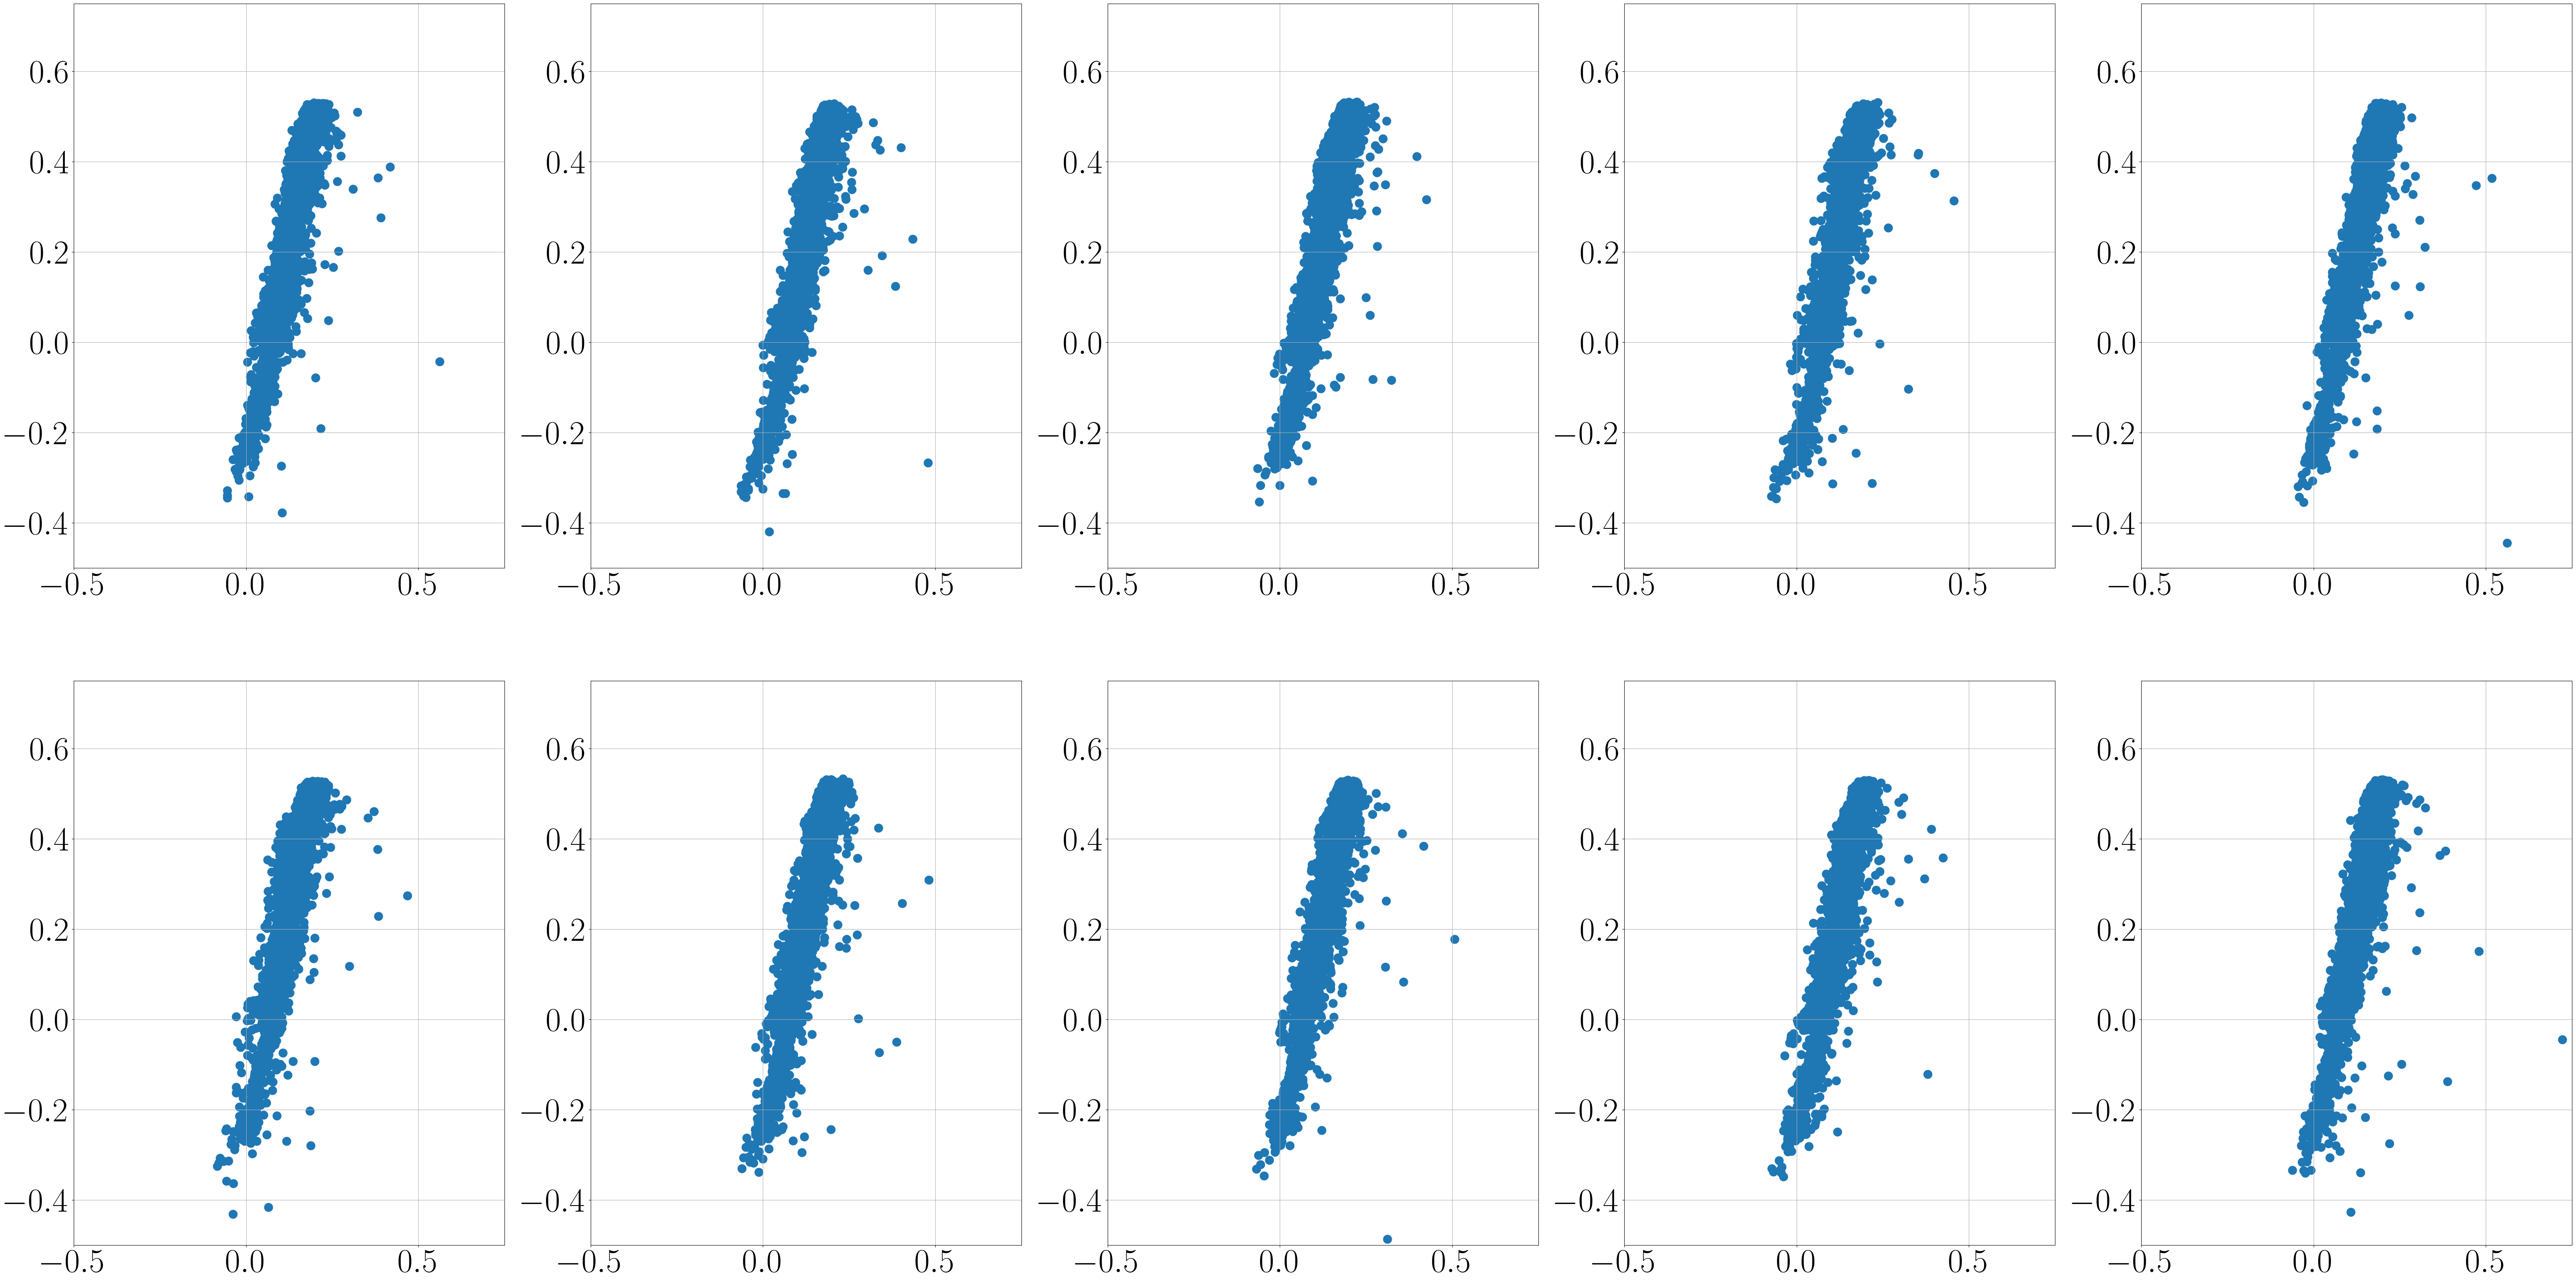

In [17]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 60
plt.rcParams['lines.markersize'] = 15
plt.rcParams['axes.grid'] = True

fig, axes = plt.subplots(2, 5, figsize =(80,40))

axes[0,0].scatter(cora_embeddings[0][:,0].to('cpu'), cora_embeddings[0][:,2].to('cpu'))
axes[0,1].scatter(cora_embeddings[1][:,0].to('cpu'), cora_embeddings[1][:,2].to('cpu'))
axes[0,2].scatter(cora_embeddings[2][:,0].to('cpu'), cora_embeddings[2][:,2].to('cpu'))
axes[0,3].scatter(cora_embeddings[3][:,0].to('cpu'), cora_embeddings[3][:,2].to('cpu'))
axes[0,4].scatter(cora_embeddings[4][:,0].to('cpu'), cora_embeddings[4][:,2].to('cpu'))

axes[1,0].scatter(cora_embeddings[5][:,0].to('cpu'), cora_embeddings[5][:,2].to('cpu'))
axes[1,1].scatter(cora_embeddings[6][:,0].to('cpu'), cora_embeddings[6][:,2].to('cpu'))
axes[1,2].scatter(cora_embeddings[7][:,0].to('cpu'), cora_embeddings[7][:,2].to('cpu'))
axes[1,3].scatter(cora_embeddings[8][:,0].to('cpu'), cora_embeddings[8][:,2].to('cpu'))
axes[1,4].scatter(cora_embeddings[9][:,0].to('cpu'), cora_embeddings[9][:,2].to('cpu'))

axes[0,0].set_xlim(-0.5,0.75)
axes[0,1].set_xlim(-0.5,0.75)
axes[0,2].set_xlim(-0.5,0.75)
axes[0,3].set_xlim(-0.5,0.75)
axes[0,4].set_xlim(-0.5,0.75)
axes[1,0].set_xlim(-0.5,0.75)
axes[1,1].set_xlim(-0.5,0.75)
axes[1,2].set_xlim(-0.5,0.75)
axes[1,3].set_xlim(-0.5,0.75)
axes[1,4].set_xlim(-0.5,0.75)

axes[0,0].set_ylim(-0.5,0.75)
axes[0,1].set_ylim(-0.5,0.75)
axes[0,2].set_ylim(-0.5,0.75)
axes[0,3].set_ylim(-0.5,0.75)
axes[0,4].set_ylim(-0.5,0.75)
axes[1,0].set_ylim(-0.5,0.75)
axes[1,1].set_ylim(-0.5,0.75)
axes[1,2].set_ylim(-0.5,0.75)
axes[1,3].set_ylim(-0.5,0.75)
axes[1,4].set_ylim(-0.5,0.75)

plt.show()

# Citeseer

In [18]:
## GENERATE EMBEDDINGS

dataset = 'citeseer'
mask = 'FULL'
device = 'cuda'
d = 6
gd_steps = 5


DATASET_FILE = f'../data/{dataset}_dataset.pkl'
Q_FILE = f'../data/{dataset}_q.pkl'
MASK_FILE = f'../data/{dataset}_mask_{mask}.pkl'
EMBEDDING_FILE = f'../data/{dataset}_glase_embeddings_d{d}_{gd_steps}steps_{mask}.pkl'
MODEL_FILE=f'../saved_models/test/{dataset}_glase_unshared_{gd_steps}steps_d{d}_{mask}.pt'


with open(DATASET_FILE, 'rb') as f:
    data = pickle.load(f)
data.to(device)

num_nodes = data.num_nodes
edge_index_2 = torch.ones([num_nodes,num_nodes],).nonzero().t().contiguous().to(device)

with open(MASK_FILE, 'rb') as f:
    mask = pickle.load(f)
mask = mask.to(device)

with open(Q_FILE, 'rb') as f:
    q = pickle.load(f)
Q = torch.diag(q[:d]).to(device)
print(q)

model = gLASE(d,d, gd_steps)
model.load_state_dict(torch.load(MODEL_FILE))
model.to('cuda')


tensor([ 1.,  1.,  1., -1., -1., -1.])


gLASE(
  (activation): Tanh()
  (gd): Sequential(
    (0) - GD_Block(): x, edge_index, edge_index_2, Q, mask -> x
    (1) - GD_Block(): x, edge_index, edge_index_2, Q, mask -> x
    (2) - GD_Block(): x, edge_index, edge_index_2, Q, mask -> x
    (3) - GD_Block(): x, edge_index, edge_index_2, Q, mask -> x
    (4) - GD_Block(): x, edge_index, edge_index_2, Q, mask -> x
  )
)

In [19]:
citeseer_embeddings = {}

for i in range(10):
    print(i)
    torch.manual_seed(i)
    x_init = get_x_init(num_nodes, d, 0, math.pi/2, 0, math.pi/2).to(device)
    model.eval()
    x_glase = model(x_init, data.edge_index, edge_index_2, Q, mask).detach()
    citeseer_embeddings[i] = x_glase

0
1
2
3
4
5
6
7
8
9


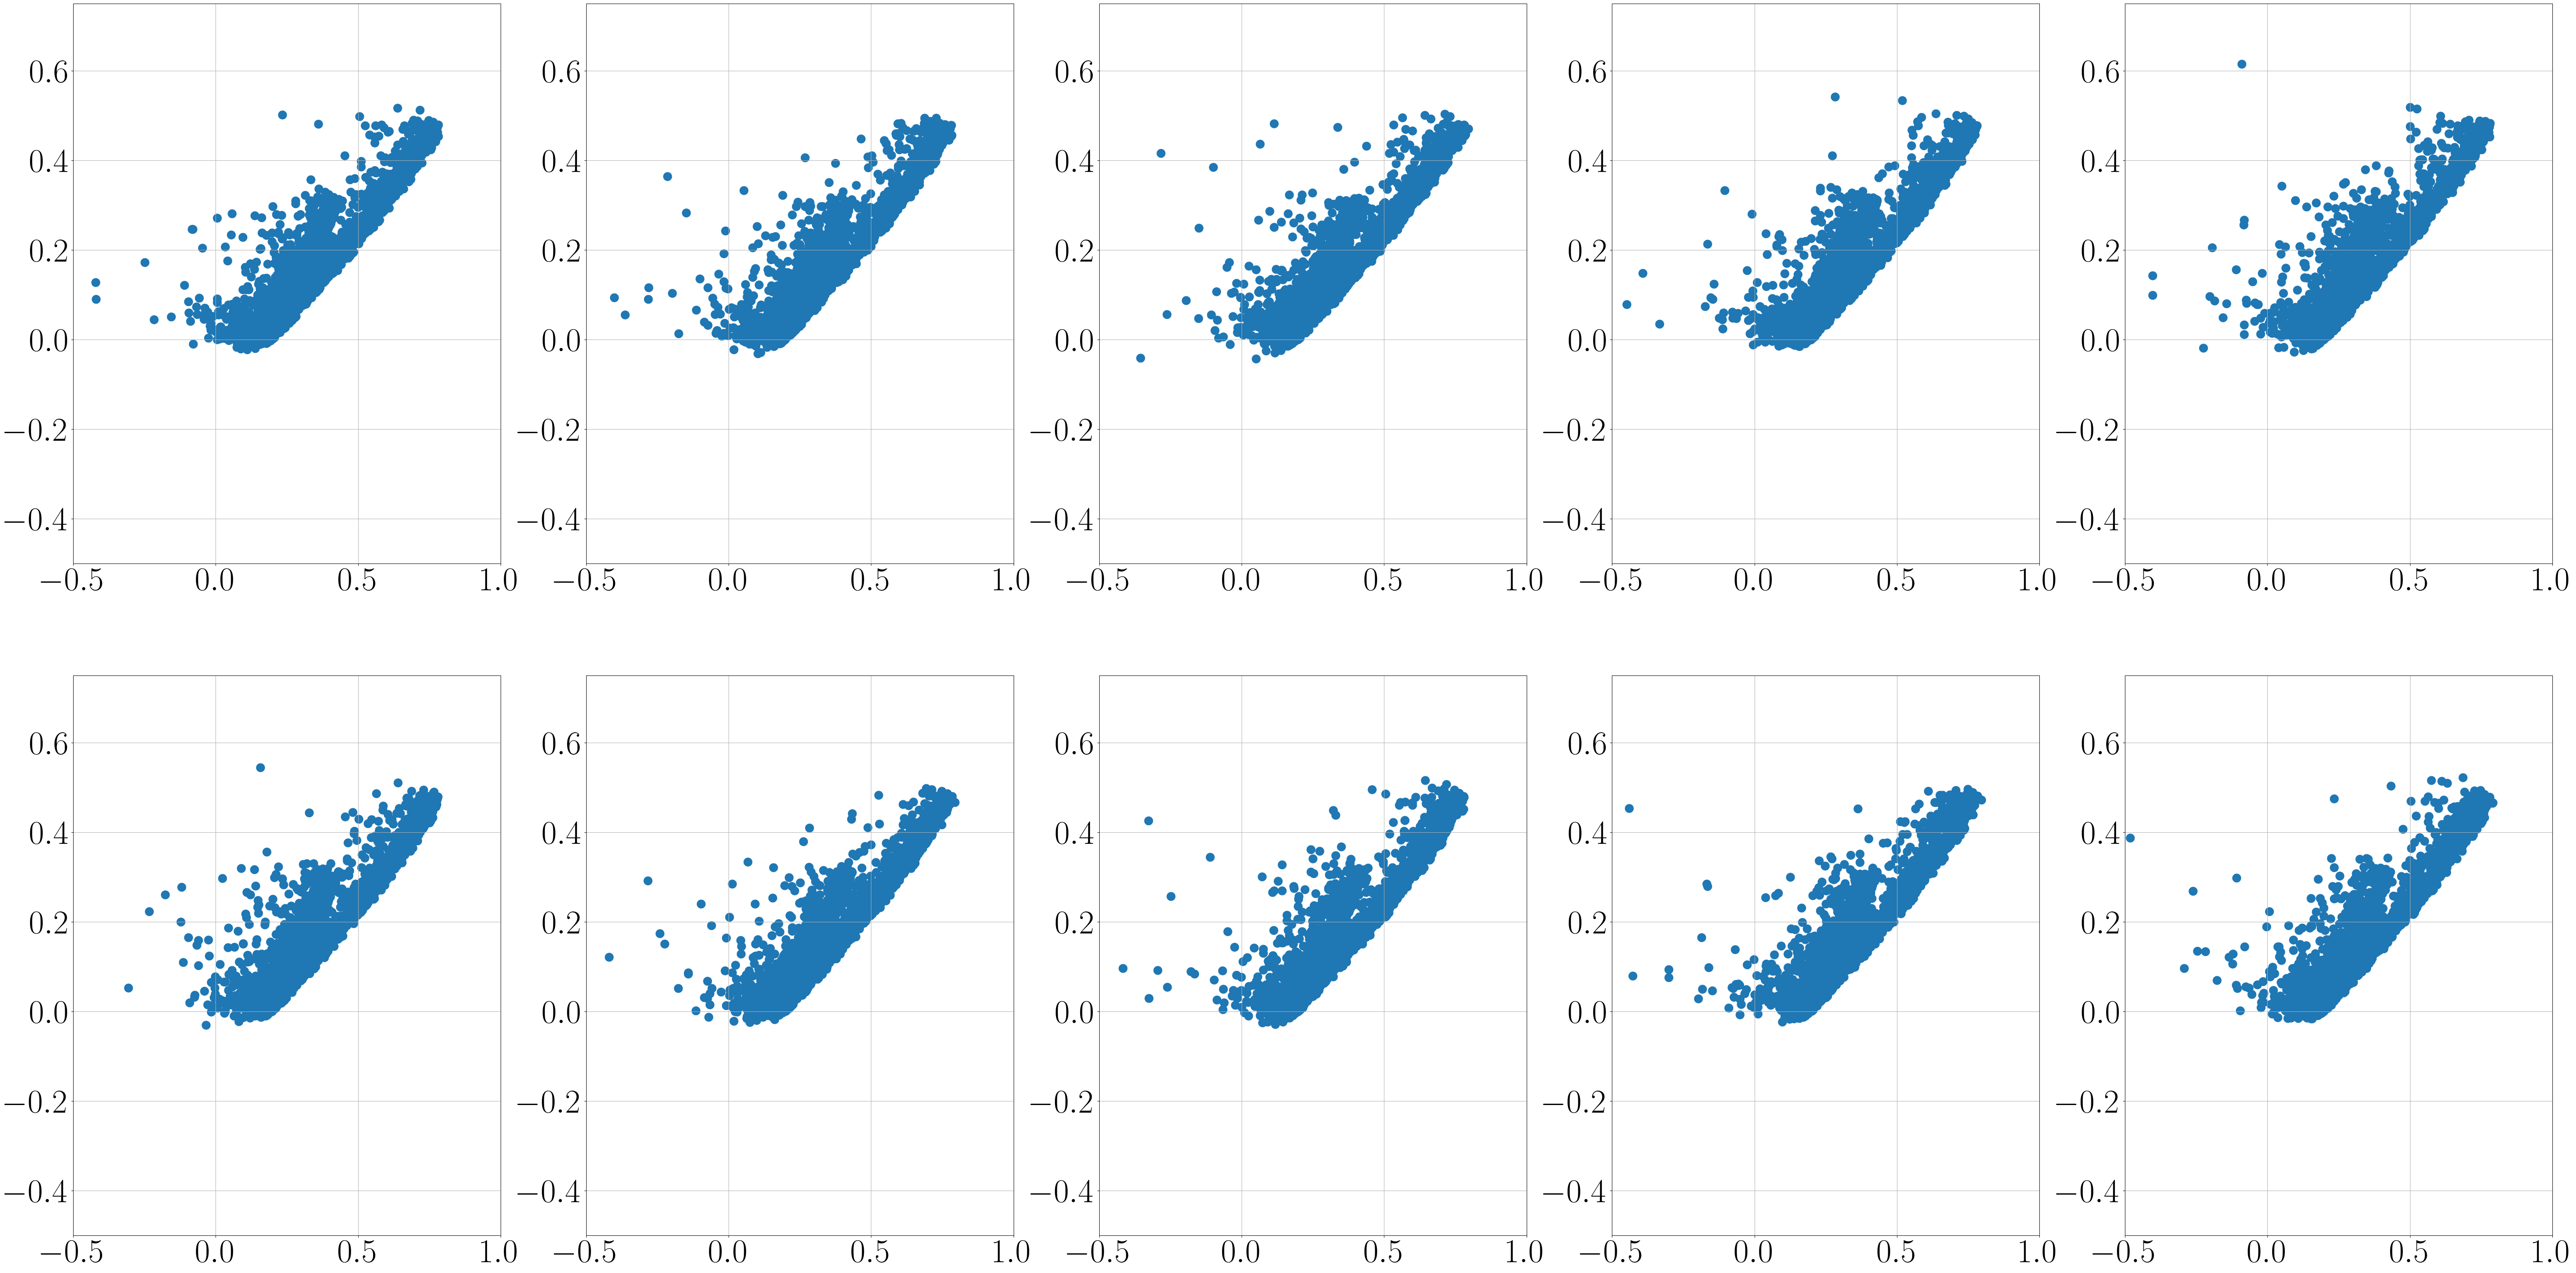

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 60
plt.rcParams['lines.markersize'] = 15
plt.rcParams['axes.grid'] = True

fig, axes = plt.subplots(2, 5, figsize =(80,40))

axes[0,0].scatter(citeseer_embeddings[0][:,0].to('cpu'), citeseer_embeddings[0][:,2].to('cpu'))
axes[0,1].scatter(citeseer_embeddings[1][:,0].to('cpu'), citeseer_embeddings[1][:,2].to('cpu'))
axes[0,2].scatter(citeseer_embeddings[2][:,0].to('cpu'), citeseer_embeddings[2][:,2].to('cpu'))
axes[0,3].scatter(citeseer_embeddings[3][:,0].to('cpu'), citeseer_embeddings[3][:,2].to('cpu'))
axes[0,4].scatter(citeseer_embeddings[4][:,0].to('cpu'), citeseer_embeddings[4][:,2].to('cpu'))
axes[1,0].scatter(citeseer_embeddings[5][:,0].to('cpu'), citeseer_embeddings[5][:,2].to('cpu'))
axes[1,1].scatter(citeseer_embeddings[6][:,0].to('cpu'), citeseer_embeddings[6][:,2].to('cpu'))
axes[1,2].scatter(citeseer_embeddings[7][:,0].to('cpu'), citeseer_embeddings[7][:,2].to('cpu'))
axes[1,3].scatter(citeseer_embeddings[8][:,0].to('cpu'), citeseer_embeddings[8][:,2].to('cpu'))
axes[1,4].scatter(citeseer_embeddings[9][:,0].to('cpu'), citeseer_embeddings[9][:,2].to('cpu'))

axes[0,0].set_xlim(-0.5,1)
axes[0,1].set_xlim(-0.5,1)
axes[0,2].set_xlim(-0.5,1)
axes[0,3].set_xlim(-0.5,1)
axes[0,4].set_xlim(-0.5,1)
axes[1,0].set_xlim(-0.5,1)
axes[1,1].set_xlim(-0.5,1)
axes[1,2].set_xlim(-0.5,1)
axes[1,3].set_xlim(-0.5,1)
axes[1,4].set_xlim(-0.5,1)

axes[0,0].set_ylim(-0.5,0.75)
axes[0,1].set_ylim(-0.5,0.75)
axes[0,2].set_ylim(-0.5,0.75)
axes[0,3].set_ylim(-0.5,0.75)
axes[0,4].set_ylim(-0.5,0.75)
axes[1,0].set_ylim(-0.5,0.75)
axes[1,1].set_ylim(-0.5,0.75)
axes[1,2].set_ylim(-0.5,0.75)
axes[1,3].set_ylim(-0.5,0.75)
axes[1,4].set_ylim(-0.5,0.75)

plt.show()

# Amazon

In [28]:
## GENERATE EMBEDDINGS

dataset = 'amazon'
mask = 'M02'
device = 'cuda'
d = 8
gd_steps = 10


DATASET_FILE = f'../data/{dataset}_dataset.pkl'
Q_FILE = f'../data/{dataset}_q.pkl'
MASK_FILE = f'../data/{dataset}_mask_{mask}.pkl'
EMBEDDING_FILE = f'../data/{dataset}_glase_embeddings_d{d}_{gd_steps}steps_{mask}.pkl'
MODEL_FILE=f'../saved_models/{dataset}_glase_unshared_{gd_steps}steps_d{d}_{mask}.pt'


with open(DATASET_FILE, 'rb') as f:
    data = pickle.load(f)
data.to(device)

num_nodes = data.num_nodes
edge_index_2 = torch.ones([num_nodes,num_nodes],).nonzero().t().contiguous().to(device)

with open(MASK_FILE, 'rb') as f:
    mask = pickle.load(f)
mask = mask.to(device)

with open(Q_FILE, 'rb') as f:
    q = pickle.load(f)
Q = torch.diag(q[:d]).to(device)
print(q)

model = gLASE(d,d, gd_steps)
model.load_state_dict(torch.load(MODEL_FILE))
model.to('cuda')


OutOfMemoryError: CUDA out of memory. Tried to allocate 530.00 MiB (GPU 0; 11.76 GiB total capacity; 11.17 GiB already allocated; 126.81 MiB free; 11.23 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [27]:
amazon_embeddings = {}

for i in range(10):
    print(i)
    torch.manual_seed(i)
    x_init = get_x_init(num_nodes, d, 0, math.pi/2, 0, math.pi/2).to(device)
    model.eval()
    x_glase = model(x_init, data.edge_index, edge_index_2, Q, mask).detach()
    amazon_embeddings[i] = x_glase

0


OutOfMemoryError: CUDA out of memory. Tried to allocate 448.00 MiB (GPU 0; 11.76 GiB total capacity; 11.17 GiB already allocated; 124.81 MiB free; 11.24 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF